In [191]:
# Import Statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
import hvplot.pandas

## Setup for Sea Level Dataset

In [3]:
# Create dataframe from csv
sea_level = "Resources/sea-levels-news-updated-years.csv"

sea_level_df = pd.read_csv(sea_level)

In [4]:
sea_level_df.head()

,country,Day,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data
0,World,1880-04-15,-183.31406,-183.31406
1,World,1880-07-15,-183.24739,-183.24739
2,World,1880-10-15,-174.14740,-174.14740
3,World,1881-01-15,-159.68073,-159.68073
4,World,1881-04-15,-172.41406,-172.41406


In [8]:
sea_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country                                                                   563 non-null    object 
 1   Day                                                                       563 non-null    object 
 2   Global sea level according to Church and White (2011)                     563 non-null    float64
 3   Global sea level as an average of Church and White (2011) and UHSLC data  519 non-null    float64
dtypes: float64(2), object(2)
memory usage: 17.7+ KB


In [10]:
sea_level_df.describe()

,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data
count,563.000000,519.000000
mean,-82.209015,-93.374739
std,68.060029,58.423227
min,-204.380720,-204.380720
25%,-138.414060,-141.214065
50%,-87.447395,-101.480730
75%,-30.564063,-43.564881
max,68.811630,36.907307


In [12]:
sea_level_df.rename(columns={"Day": "Time"}, inplace=True)
sea_level_df["Time"] = pd.to_datetime(sea_level_df["Time"])

sea_level_df["Year"] = sea_level_df["Time"].dt.year
sea_level_df["Month"] = sea_level_df["Time"].dt.month
sea_level_df["Day"] = sea_level_df["Time"].dt.day

In [14]:
duplicate_rows = sea_level_df[sea_level_df.duplicated()]
duplicate_rows

,country,Time,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data,Year,Month,Day


In [16]:
print(sea_level_df.isnull().sum())

country                                                                      0
Time                                                                         0
Global sea level according to Church and White (2011)                        0
Global sea level as an average of Church and White (2011) and UHSLC data    44
Year                                                                         0
Month                                                                        0
Day                                                                          0
dtype: int64


In [18]:
# Rename columns and drop extraneous column
sea_level_df.rename(columns={'Global sea level according to Church and White (2011)': 'Global Sea Level Change', 'No_Smoothing': 'Global Temperature Change'}, inplace=True)
sea_level_df.drop(columns=["Global sea level as an average of Church and White (2011) and UHSLC data"], inplace=True)

# Check first 5 rows in new df
sea_level_df.head()

,country,Time,Global Sea Level Change,Year,Month,Day
0,World,1880-04-15,-183.31406,1880,4,15
1,World,1880-07-15,-183.24739,1880,7,15
2,World,1880-10-15,-174.14740,1880,10,15
3,World,1881-01-15,-159.68073,1881,1,15
4,World,1881-04-15,-172.41406,1881,4,15


## Setup for Global Temperature Dataset

In [21]:
# Create dataframe from csv
global_temp = "Resources/Global_annual_mean_temp.csv"

global_temp_df = pd.read_csv(global_temp)

In [23]:
global_temp_df.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


In [25]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          144 non-null    int64  
 1   No_Smoothing  144 non-null    float64
 2   Lowess(5)     144 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [27]:
global_temp_df.describe()

,Year,No_Smoothing,Lowess(5)
count,144.000000,144.000000,144.000000
mean,1951.500000,0.067500,0.066528
std,41.713307,0.378167,0.364276
min,1880.000000,-0.480000,-0.410000
25%,1915.750000,-0.200000,-0.222500
50%,1951.500000,-0.045000,-0.035000
75%,1987.250000,0.280000,0.280000
max,2023.000000,1.170000,1.010000


In [29]:
global_temp_df.rename(columns={"No_Smoothing": "Global Temperature Change"}, inplace=True)
global_temp_df["Year"] = pd.to_datetime(global_temp_df["Year"], format='%Y')

global_temp_df["Year"] = global_temp_df["Year"].dt.year
global_temp_df.head()

,Year,Global Temperature Change,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


In [31]:
print(global_temp_df.isnull().sum())

Year                         0
Global Temperature Change    0
Lowess(5)                    0
dtype: int64


In [33]:
# Drop extraneous column
global_temp_df.drop(columns=["Lowess(5)"], inplace=True)

# Check first 5 rows in new df
global_temp_df.head()

,Year,Global Temperature Change
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28


## Setup for Global CO2 Dataset

In [69]:
# Create dataframe from csv
co2_level = "Resources/annual-co-emissions-by-region.csv"

co2_level_df = pd.read_csv(co2_level)

In [71]:
co2_level_df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [73]:
co2_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB


In [75]:
co2_level_df.describe()

,Year,Annual CO₂ emissions
count,29137.000000,2.913700e+04
mean,1947.718022,4.154861e+08
std,58.985133,1.944680e+09
min,1750.000000,0.000000e+00
25%,1912.000000,3.737280e+05
50%,1962.000000,4.990392e+06
75%,1994.000000,5.327268e+07
max,2023.000000,3.779157e+10


In [77]:
duplicate_rows = co2_level_df[co2_level_df.duplicated()]
duplicate_rows

,Entity,Code,Year,Annual CO₂ emissions


In [79]:
print(co2_level_df.isnull().sum())

Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64


In [81]:
co2_level_df.rename(columns={"Annual CO₂ emissions": "Annual CO₂ Emissions"}, inplace=True)
co2_level_df.head()

,Entity,Code,Year,Annual CO₂ Emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [83]:
null_rows = co2_level_df[co2_level_df.isnull().any(axis=1)]
null_rows

,Entity,Code,Year,Annual CO₂ Emissions
75,Africa,NaN,1884,2.198400e+04
76,Africa,NaN,1885,3.664000e+04
77,Africa,NaN,1886,4.763200e+04
78,Africa,NaN,1887,4.763200e+04
79,Africa,NaN,1888,8.060800e+04
...,...,...,...,...
27867,Upper-middle-income countries,NaN,2019,1.635260e+10
27868,Upper-middle-income countries,NaN,2020,1.620203e+10
27869,Upper-middle-income countries,NaN,2021,1.698064e+10
27870,Upper-middle-income countries,NaN,2022,1.698954e+10


In [85]:
co2_df_cleaned = co2_level_df.dropna(subset=['Code'])
co2_df_cleaned[co2_df_cleaned.isnull().any(axis=1)]

,Entity,Code,Year,Annual CO₂ Emissions


In [87]:
co2_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23497 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                23497 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  23497 non-null  int64  
 3   Annual CO₂ Emissions  23497 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 917.9+ KB


In [89]:
print(co2_df_cleaned.isnull().sum())

Entity                  0
Code                    0
Year                    0
Annual CO₂ Emissions    0
dtype: int64


In [91]:
country_codes = [
    "ABW", "AFG", "AGO", "AIA", "ALA", "ALB", "AND", "ARE", "ARG", "ARM", "ASM", 
    "ATA", "ATF", "ATG", "AUS", "AUT", "AZE", "BDI", "BEL", "BEN", "BES", "BFA", 
    "BGD", "BGR", "BHR", "BHS", "BIH", "BLM", "BLR", "BLZ", "BMU", "BOL", "BRA", 
    "BRB", "BRN", "BTN", "BVT", "BWA", "CAF", "CAN", "CCK", "CHE", "CHL", "CHN", 
    "CIV", "CMR", "COD", "COG", "COK", "COL", "COM", "CPV", "CRI", "CUB", "CUW", 
    "CXR", "CYM", "CYP", "CZE", "DEU", "DJI", "DMA", "DNK", "DOM", "DZA", "ECU", 
    "EGY", "ERI", "ESH", "ESP", "EST", "ETH", "FIN", "FJI", "FLK", "FRA", "FRO", 
    "FSM", "GAB", "GBR", "GEO", "GGY", "GHA", "GIB", "GIN", "GLP", "GMB", "GNB", 
    "GNQ", "GRC", "GRD", "GRL", "GTM", "GUF", "GUM", "GUY", "HKG", "HMD", "HND", 
    "HRV", "HTI", "HUN", "IDN", "IMN", "IND", "IOT", "IRL", "IRN", "IRQ", "ISL", 
    "ISR", "ITA", "JAM", "JEY", "JOR", "JPN", "KAZ", "KEN", "KGZ", "KHM", "KIR", 
    "KNA", "KOR", "KWT", "LAO", "LBN", "LBR", "LBY", "LCA", "LIE", "LKA", "LSO", 
    "LTU", "LUX", "LVA", "MAC", "MAF", "MAR", "MCO", "MDA", "MDG", "MDV", "MEX", 
    "MHL", "MKD", "MLI", "MLT", "MMR", "MNE", "MNG", "MNP", "MOZ", "MRT", "MSR", 
    "MTQ", "MUS", "MWI", "MYS", "MYT", "NAM", "NCL", "NER", "NFK", "NGA", "NIC", 
    "NIU", "NLD", "NOR", "NPL", "NRU", "NZL", "OMN", "PAK", "PAN", "PCN", "PER", 
    "PHL", "PLW", "PNG", "POL", "PRI", "PRK", "PRT", "PRY", "PSE", "PYF", "QAT", 
    "REU", "ROU", "RUS", "RWA", "SAU", "SDN", "SEN", "SGP", "SGS", "SHN", "SJM", 
    "SLB", "SLE", "SLV", "SMR", "SOM", "SPM", "SRB", "SSD", "STP", "SUR", "SVK", 
    "SVN", "SWE", "SWZ", "SXM", "SYC", "SYR", "TCA", "TCD", "TGO", "THA", "TJK", 
    "TKL", "TKM", "TLS", "TON", "TTO", "TUN", "TUR", "TUV", "TWN", "TZA", "UGA", 
    "UKR", "UMI", "URY", "USA", "UZB", "VAT", "VCT", "VEN", "VGB", "VIR", "VNM", 
    "VUT", "WLF", "WSM", "YEM", "ZAF", "ZMB", "ZWE"
]

In [93]:
co2_df_cleaned = co2_df_cleaned[co2_df_cleaned["Code"].isin(country_codes)]
co2_df_cleaned.head()

,Entity,Code,Year,Annual CO₂ Emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [95]:
co2_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                23193 non-null  object 
 1   Code                  23193 non-null  object 
 2   Year                  23193 non-null  int64  
 3   Annual CO₂ Emissions  23193 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 906.0+ KB


## Merge Sea Level, Temperature, and CO2 Dataframes

In [98]:
sea_avg_df = sea_level_df.groupby("Year")["Global Sea Level Change"].mean()
sea_avg_df.head(10)

Year
1880   -180.236283
1881   -173.039065
1882   -191.580733
1883   -190.455727
1884   -166.597397
1885   -168.555730
1886   -169.597397
1887   -176.764062
1888   -174.155728
1889   -171.480732
Name: Global Sea Level Change, dtype: float64

In [100]:
# Check number of unique year values for global temps
global_temp_df["Year"].size

144

In [102]:
# Check unique year values for global temps
global_temp_df.tail()

,Year,Global Temperature Change
139,2019,0.98
140,2020,1.02
141,2021,0.84
142,2022,0.89
143,2023,1.17


In [104]:
# Check number of unique year values for sea levels
sea_avg_df.unique().size

141

In [106]:
# Check unique year values for sea levels
sea_avg_df.index.unique()

Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       ...
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int32', name='Year', length=141)

In [108]:
# Merge two df's on Year using inner to remove last 3 years from global temp df
sea_level_temp_df = pd.merge(sea_avg_df, global_temp_df, on="Year", how="inner")

# Check first 5 rows in new df
sea_level_temp_df.head()

,Year,Global Sea Level Change,Global Temperature Change
0,1880,-180.236283,-0.17
1,1881,-173.039065,-0.09
2,1882,-191.580733,-0.11
3,1883,-190.455727,-0.18
4,1884,-166.597397,-0.28


In [110]:
# Check last 5 rows in new df
sea_level_temp_df.tail()

,Year,Global Sea Level Change,Global Temperature Change
136,2016,56.330711,1.01
137,2017,55.112391,0.92
138,2018,52.083274,0.85
139,2019,60.980738,0.98
140,2020,65.999739,1.02


In [112]:
annual_emissions_df = co2_df_cleaned.groupby('Year')['Annual CO₂ Emissions'].mean()
annual_emissions_df

Year
1750    1.861187e+06
1751    1.881446e+06
1752    1.901034e+06
1753    1.922098e+06
1754    1.946716e+06
            ...     
2019    1.667214e+08
2020    1.593685e+08
2021    1.678572e+08
2022    1.686747e+08
2023    1.705424e+08
Name: Annual CO₂ Emissions, Length: 274, dtype: float64

In [114]:
annual_emissions_df = pd.DataFrame(annual_emissions_df).reset_index()
annual_emissions_df.head()

,Year,Annual CO₂ Emissions
0,1750,1861187.4
1,1751,1881445.8
2,1752,1901033.6
3,1753,1922098.0
4,1754,1946716.0


In [116]:
# Filter the DataFrame for years between 1880 and 2020 (inclusive)
annual_emissions_filtered_df = annual_emissions_df[(annual_emissions_df['Year'] >= 1880) & (annual_emissions_df['Year'] <= 2020)]

# Display the filtered DataFrame
annual_emissions_filtered_df.head()

,Year,Annual CO₂ Emissions
130,1880,1.430093e+07
131,1881,1.455680e+07
132,1882,1.563147e+07
133,1883,1.635270e+07
134,1884,1.654803e+07


In [118]:
annual_emissions_filtered_df.tail()

,Year,Annual CO₂ Emissions
266,2016,1.592328e+08
267,2017,1.617301e+08
268,2018,1.650013e+08
269,2019,1.667214e+08
270,2020,1.593685e+08


In [120]:
sea_temp_emissions_df = pd.merge(annual_emissions_filtered_df, sea_level_temp_df, on='Year', how='inner')

# Display the merged DataFrame
sea_temp_emissions_df.head()

,Year,Annual CO₂ Emissions,Global Sea Level Change,Global Temperature Change
0,1880,1.430093e+07,-180.236283,-0.17
1,1881,1.455680e+07,-173.039065,-0.09
2,1882,1.563147e+07,-191.580733,-0.11
3,1883,1.635270e+07,-190.455727,-0.18
4,1884,1.654803e+07,-166.597397,-0.28


In [122]:
sea_temp_emissions_df.tail()

,Year,Annual CO₂ Emissions,Global Sea Level Change,Global Temperature Change
136,2016,1.592328e+08,56.330711,1.01
137,2017,1.617301e+08,55.112391,0.92
138,2018,1.650013e+08,52.083274,0.85
139,2019,1.667214e+08,60.980738,0.98
140,2020,1.593685e+08,65.999739,1.02


## Visualizations

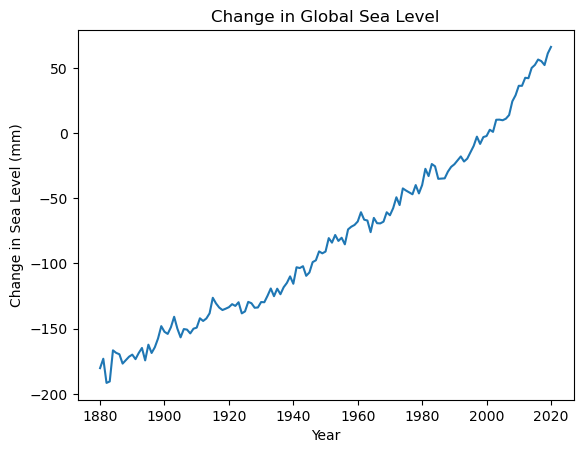

In [143]:
# Line graph showing sea level over time
year_values = sea_temp_emissions_df["Year"]
sea_values = sea_temp_emissions_df["Global Sea Level Change"]

plt.plot(year_values, sea_values)
plt.title("Change in Global Sea Level")
plt.xlabel("Year")
plt.ylabel("Change in Sea Level (mm)")

#save figure
plt.savefig("output_data/Fig1.png")

plt.show()

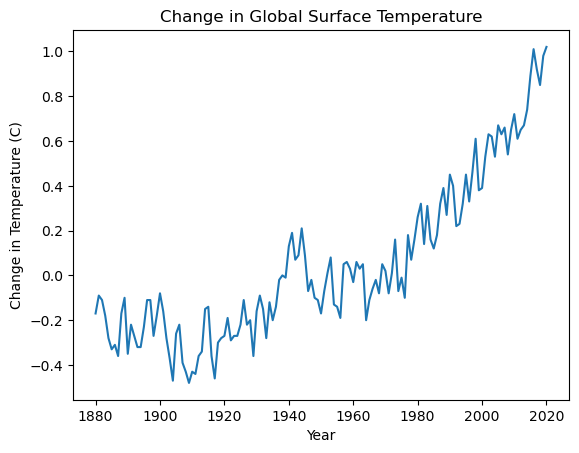

In [145]:
# Line graph showing temperatures over time
year_values = sea_temp_emissions_df["Year"]
temp_values = sea_temp_emissions_df["Global Temperature Change"]

plt.plot(year_values, temp_values)
plt.title("Change in Global Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Change in Temperature (C)")

#save figure
plt.savefig("output_data/Fig2.png")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

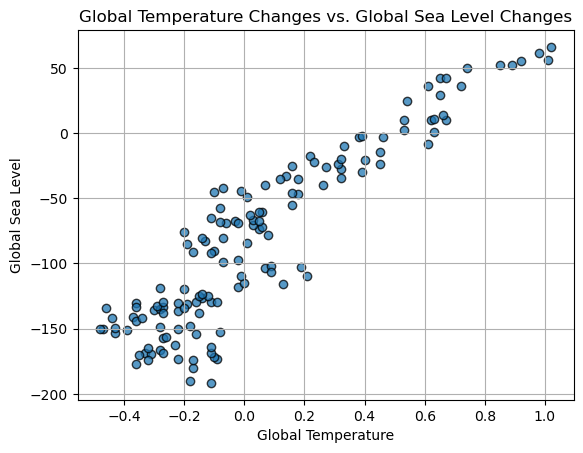

In [147]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Global Temperature Change'], sea_temp_emissions_df['Global Sea Level Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Global Temperature Changes vs. Global Sea Level Changes")
plt.xlabel("Global Temperature")
plt.ylabel("Global Sea Level")
plt.grid()

#save figure
plt.savefig("output_data/Fig3.png")

plt.show

In [149]:
#define function to create linear regression
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

The r^2 value is : 0.8299105724331507


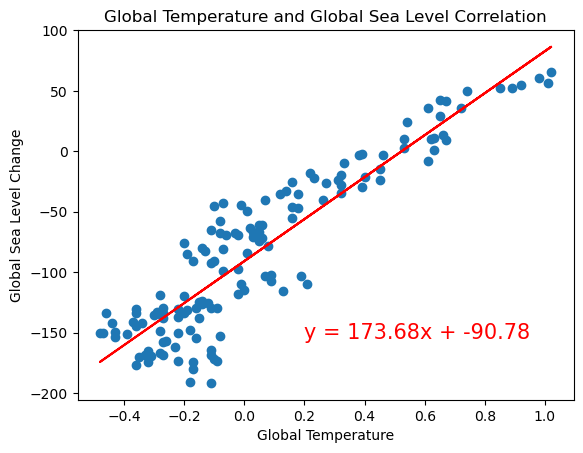

In [151]:
#lineral regression
x_values = sea_temp_emissions_df["Global Temperature Change"]
y_values = sea_temp_emissions_df["Global Sea Level Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.2, -155),fontsize=15,color='red')
plt.title("Global Temperature and Global Sea Level Correlation")
plt.xlabel('Global Temperature')
plt.ylabel('Global Sea Level Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig4.png")

plt.show()

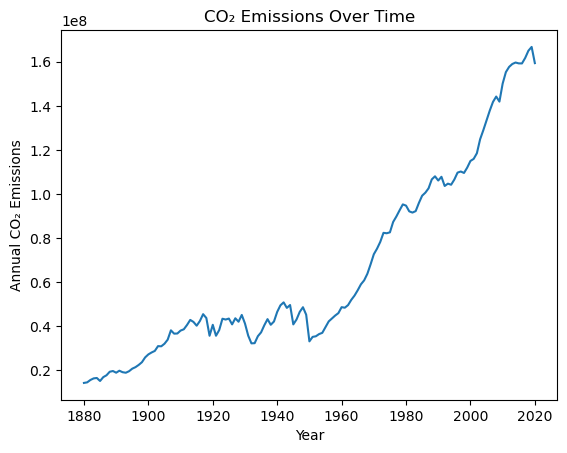

In [157]:
#line graph pf global emissions over time
year_values = sea_temp_emissions_df['Year']
emission_values = sea_temp_emissions_df['Annual CO₂ Emissions']

plt.plot(year_values, emission_values)
plt.title('CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions')

#save figure
plt.savefig("output_data/Fig5.png")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

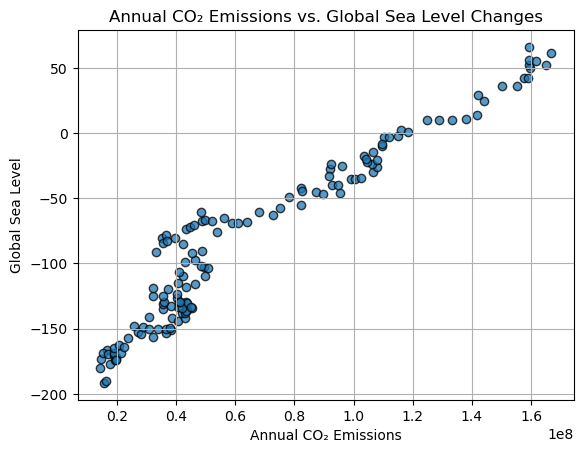

In [161]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Annual CO₂ Emissions'], sea_temp_emissions_df['Global Sea Level Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Annual CO₂ Emissions vs. Global Sea Level Changes")
plt.xlabel("Annual CO₂ Emissions")
plt.ylabel("Global Sea Level")
plt.grid()

#save figure
plt.savefig("output_data/Fig6.png")

plt.show

The r^2 value is : 0.9204995857589146


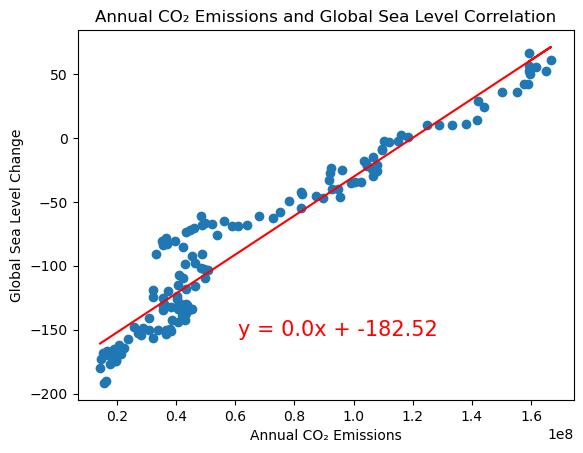

In [165]:
#lineral regression
x_values = sea_temp_emissions_df["Annual CO₂ Emissions"]
y_values = sea_temp_emissions_df["Global Sea Level Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.61e8, -155),fontsize=15,color='red')
plt.title("Annual CO₂ Emissions and Global Sea Level Correlation")
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Global Sea Level Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig7.png")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

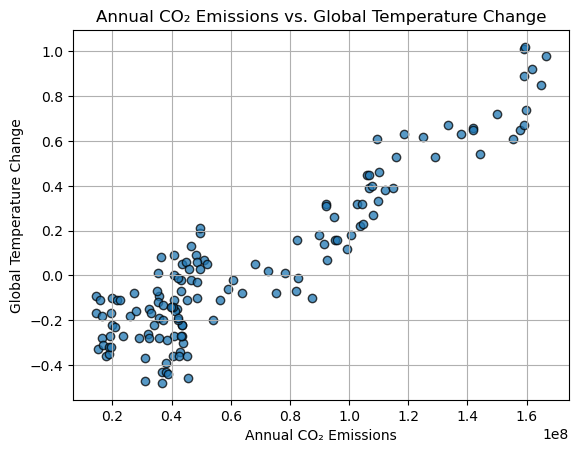

In [167]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Annual CO₂ Emissions'], sea_temp_emissions_df['Global Temperature Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Annual CO₂ Emissions vs. Global Temperature Change")
plt.xlabel("Annual CO₂ Emissions")
plt.ylabel("Global Temperature Change")
plt.grid()

#save figure
plt.savefig("output_data/Fig8.png")

plt.show

The r^2 value is : 0.8451948697817372


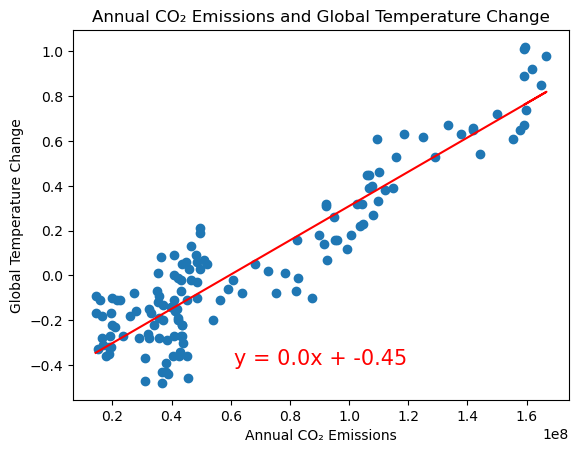

In [171]:
#lineral regression
x_values = sea_temp_emissions_df["Annual CO₂ Emissions"]
y_values = sea_temp_emissions_df["Global Temperature Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.61e8, -0.4),fontsize=15,color='red')
plt.title("Annual CO₂ Emissions and Global Temperature Change")
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Global Temperature Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig9.png")

plt.show()

In [193]:
emissions = sea_temp_emissions_df["Annual CO₂ Emissions"]
temp = sea_temp_emissions_df["Global Temperature Change"]

stats.ttest_ind(emissions, temp, equal_var=False)

TtestResult(statistic=18.175610001534483, pvalue=1.1556806877997309e-38, df=140.0)

A larger absolute value of the t-statistic means there is a larger difference between the groups.

A p-value this small strongly suggests rejecting the null hypothesis, meaning the difference between the groups is statistically significant.